## 데이터 로드 및 정보 확인

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import numpy as np

font_path = 'C:\\Windows\\Fonts\\HMFMPYUN.TTF' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)
# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
plt.rc('axes', unicode_minus=False)

In [22]:
df = pd.read_csv('data/shopping_behavior_updated.csv')
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

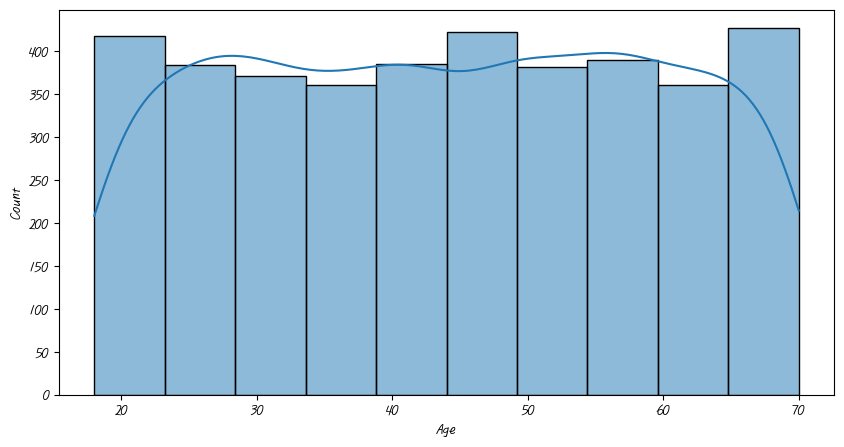

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.show()

In [5]:
# 나이 분석 / shape[0] 으로 사람 수가 있는 행만 남기기
age_10to20 = df[(df['Age'] >= 10) & (df['Age'] < 20)].shape[0]
age_20to30 = df[(df['Age'] >= 20) & (df['Age'] < 30)].shape[0]
age_30to40 = df[(df['Age'] >= 30) & (df['Age'] < 40)].shape[0]
age_40to50 = df[(df['Age'] >= 40) & (df['Age'] < 50)].shape[0]
age_50to60 = df[(df['Age'] >= 50) & (df['Age'] < 60)].shape[0]
age_50up = df[df['Age'] >= 60].shape[0]

age_10to20 # 150
age_20to30 # 728
age_30to40 # 724
age_40to50 # 739
age_50to60 # 771
age_50up # 788

788

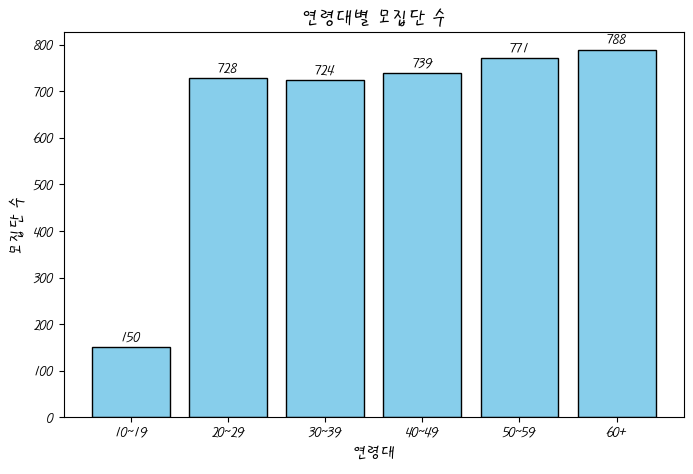

In [6]:
age_groups = ['10~19', '20~29', '30~39', '40~49', '50~59', '60+']
counts = [age_10to20, age_20to30, age_30to40, age_40to50, age_50to60, age_50up]

plt.figure(figsize=(8, 5))

plt.bar(age_groups, counts, color='skyblue', edgecolor='black')

plt.title('연령대별 모집단 수', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('모집단 수', fontsize=12)

# 값 표시
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

# 그래프 보여주기
plt.show()

In [7]:
# 상품의 종류
df["Item Purchased"].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [8]:
# 성별에 따른 구매 항목별 금액
gender_item_df = pd.pivot_table(df, index='Gender', columns='Item Purchased',
                            values='Purchase Amount (USD)',
                            fill_value=0,
                            aggfunc='mean',
                            margins=True).round(2)
gender_item_df

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt,All
Gender,,,,,,,,,,,,,,,,,,,,,
Female,65.22,58.35,60.85,64.52,60.57,67.15,65.30,57.62,59.96,58.96,...,60.20,60.17,58.27,62.27,61.40,55.36,58.00,58.46,59.07,60.25
Male,58.71,60.62,60.90,61.62,56.39,59.89,58.84,58.05,61.34,57.60,...,61.64,62.27,60.88,58.27,58.80,59.81,60.96,57.36,64.66,59.54
All,60.39,59.84,60.88,62.62,57.61,62.17,60.55,57.89,60.88,58.06,...,61.14,61.60,60.08,59.51,59.55,58.19,59.93,57.70,62.91,59.76


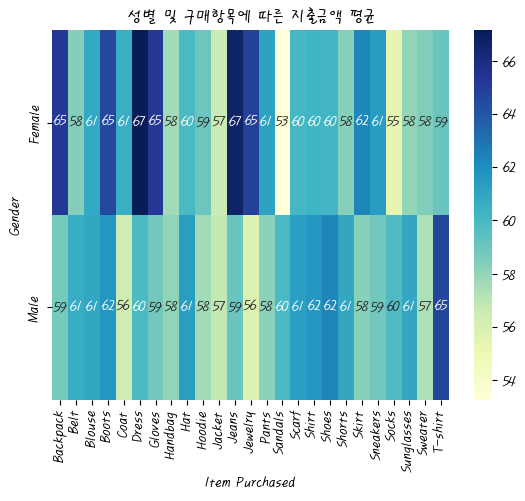

In [9]:
import seaborn as sns

sns.heatmap(gender_item_df.drop('All').drop('All', axis=1), annot=True, cmap='YlGnBu')
plt.title('성별 및 구매항목에 따른 지출금액 평균')
plt.show()

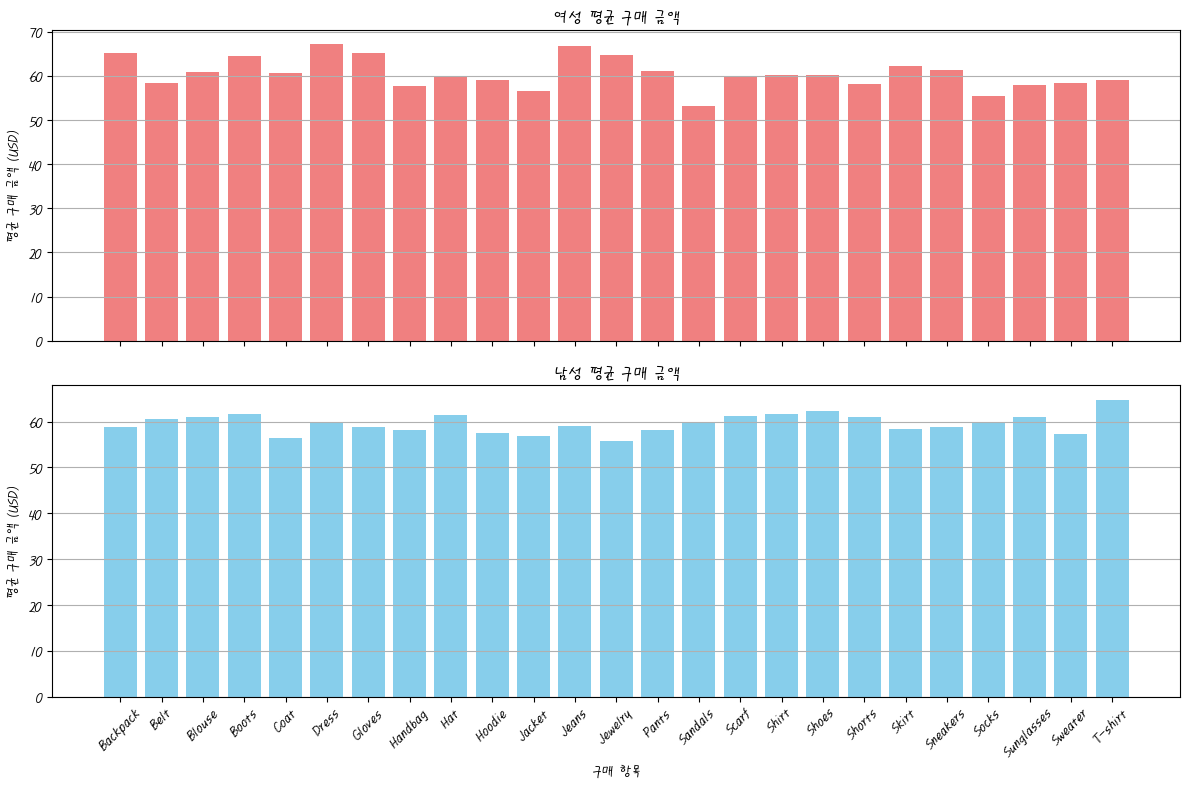

In [10]:
gender_item_plot = gender_item_df.drop('All').drop('All', axis=1)

# 성별 목록
genders = gender_item_plot.index

# 여자 남자에 대한 subplot
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 여성 데이터
ax[0].bar(gender_item_plot.columns, gender_item_plot.loc['Female'], color='lightcoral')
ax[0].set_title('여성 평균 구매 금액')
ax[0].set_ylabel('평균 구매 금액 (USD)')
ax[0].grid(axis='y')

# 남성 데이터
ax[1].bar(gender_item_plot.columns, gender_item_plot.loc['Male'], color='skyblue')
ax[1].set_title('남성 평균 구매 금액')
ax[1].set_ylabel('평균 구매 금액 (USD)')
ax[1].set_xlabel('구매 항목')
ax[1].grid(axis='y')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# 컬러 종류
df["Color"].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [12]:
df["Color"].max()

'Yellow'

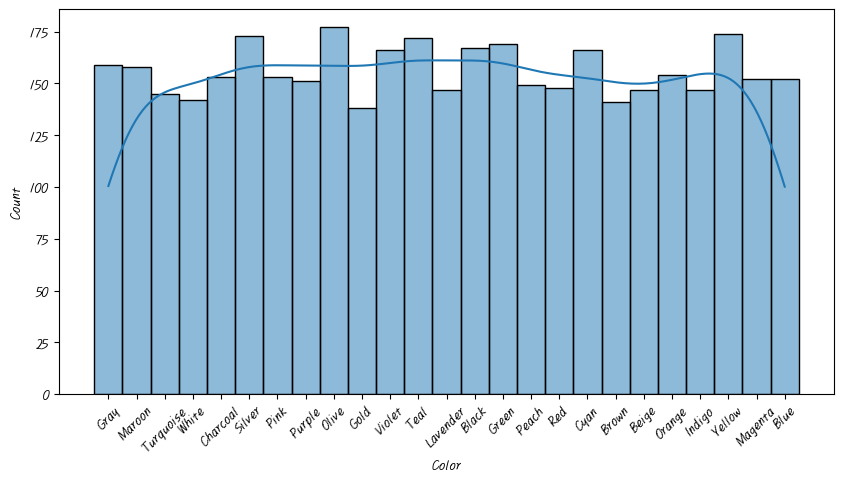

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Color'], kde=True)
plt.xticks(rotation=45)
plt.show()

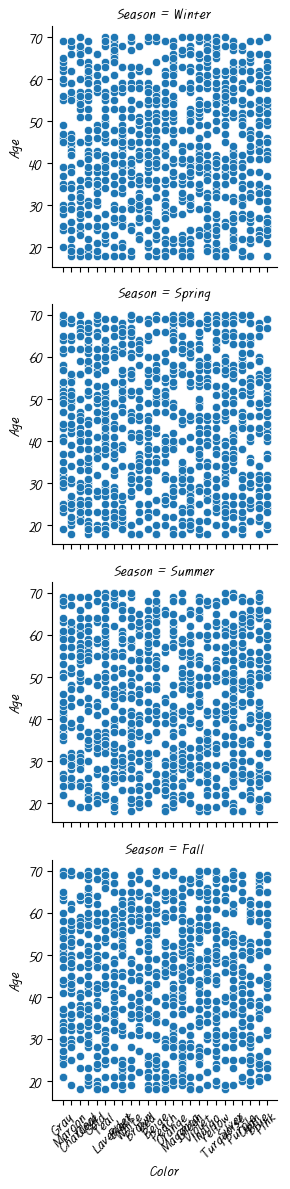

In [14]:
# 계절에 따른 구매 빈도 (아무상관 없어보임!!!!!!!!)
facet_grid = sns.FacetGrid(
    data = df, row='Season'
)
plt.xticks(rotation=45)
facet_grid.map(sns.scatterplot, 'Color', 'Age')
plt.show()

C:\Users\tj\AppData\Local\Temp\ipykernel_15024\2829868146.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_counts = df.groupby(['RatingGroup', 'Discount Applied']).size().reset_index(name='Count')


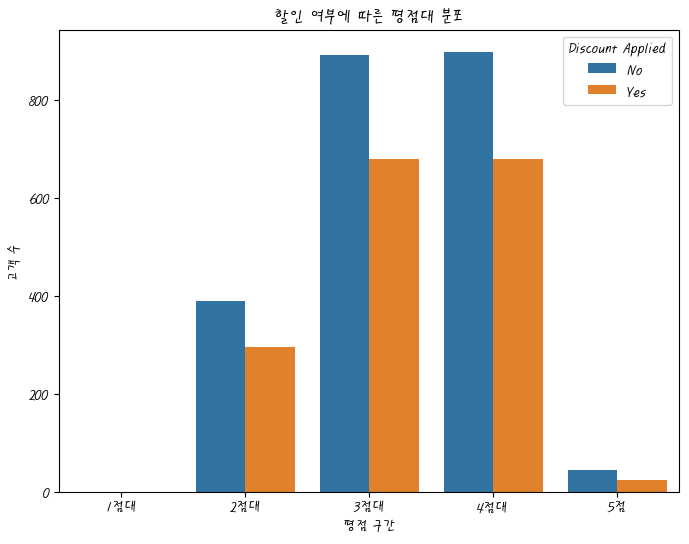

In [15]:
bins = [0.9, 1.9, 2.9, 3.9, 4.9, 5.1]  # 경계값 포함용
labels = ['1점대', '2점대', '3점대', '4점대', '5점']
df['RatingGroup'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, right=True)

# 2. 할인 여부별 평점대 개수 집계
rating_counts = df.groupby(['RatingGroup', 'Discount Applied']).size().reset_index(name='Count')

# 3. 시각화
plt.figure(figsize=(8,6))
sns.barplot(data=rating_counts, x='RatingGroup', y='Count', hue='Discount Applied')
plt.title('할인 여부에 따른 평점대 분포')
plt.xlabel('평점 구간')
plt.ylabel('고객 수')
plt.show()

## 11/12
오늘 해볼 것

어떤 요인이 소비 금액(Amount)에 영향을 주는가?

연령대별 소비 패턴?
10대~20대는 30대 이상보다 낮은 금액을 소비할까?
==  연령대별 구매 금액의 평균을 구해야 함

성별·컬러 선호도별 평균 구매 금액?
여성은 밝은 색에 대한 구매금액이 높고, 남성은 블랙계열을 선호한다던지 등
== 마찬가지로 구매 금액을 평균으로 구하는데,
1. 여성이랑 남성중에서는 누가 소비하는 금액 평균이 더 높은지
2. '컬러별'로 소비금액의 합계는 어떻게 되는지?

구독 여부 분석 :
구독 여부가 구매 빈도에 영향을 미치는가?

In [16]:
# 연령대별 소비 금액의 평균
bins = [10, 20, 30, 40, 50, 60, 120]
labels = ['10~19','20~29','30~39','40~49','50~59','60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_avg = df.groupby('Age_Group')['Purchase Amount (USD)'].mean()
print(age_group_avg)

Age_Group
10~19    60.533333
20~29    60.199176
30~39    60.139503
40~49    58.491204
50~59    60.332036
60+      59.510152
Name: Purchase Amount (USD), dtype: float64


C:\Users\tj\AppData\Local\Temp\ipykernel_15024\887741064.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = df.groupby('Age_Group')['Purchase Amount (USD)'].mean()


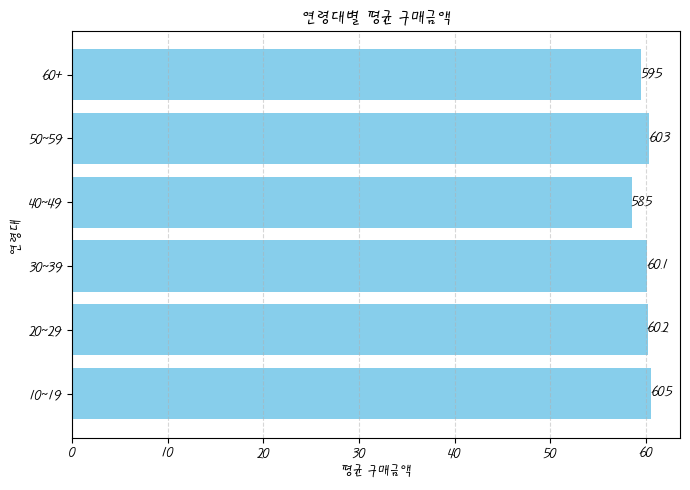

In [17]:
data = age_group_avg

# 수평 막대그래프
plt.figure(figsize=(7,5))
plt.barh(data.index, data.values, color='skyblue')

plt.title('연령대별 평균 구매금액')
plt.xlabel('평균 구매금액')
plt.ylabel('연령대')
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i in range(len(data)):
    plt.text(data.values[i], i, round(data.values[i], 1),
            va='center', ha='left')

plt.tight_layout()
plt.show()


In [18]:
top5_by_age = (
    top_items_by_age
    .sort_values(['Age_Group', 'Count'], ascending=[True, False])
    .groupby('Age_Group')
    .head(5)
)

top_data = top5_by_age.dropna().copy()

g = sns.catplot(
    data=top_data,
    x='Count',
    y='Item Purchased',
    col='Age_Group',
    kind='bar',
    col_wrap=3,
    palette="cool",
    sharex=False, sharey=False,
    height=4
)
g.set_titles("{col_name}세")
g.fig.suptitle("연령대별 상위 5개 인기 상품", fontsize=16, y=1.05)
plt.show()

NameError: name 'top_items_by_age' is not defined

In [ ]:
# 청년층 (18~34)
youth = df[(df['Age'] >= 18) & (df['Age'] <= 34)].shape[0]

# 중년층 (35~49)
middle = df[(df['Age'] >= 35) & (df['Age'] <= 49)].shape[0]

# 장년층 (50~64)
senior = df[(df['Age'] >= 50) & (df['Age'] <= 64)].shape[0]

# 고령층 (65세 이상)
elderly = df[df['Age'] >= 65].shape[0]

print("청년층(18~34세):", youth)
print("중년층(35~49세):", middle)
print("장년층(50~64세):", senior)
print("고령층(65세 이상):", elderly)

청년층(18~34세): 1241
중년층(35~49세): 1100
장년층(50~64세): 1132
고령층(65세 이상): 427


In [ ]:
top5_by_age = (
    top_items_by_age
    .sort_values(['Age_Group', 'Count'], ascending=[True, False])
    .groupby('Age_Group')
    .head(5)
)

top_data = top5_by_age.dropna().copy()

g = sns.catplot(
    data=top_data,
    x='Count',
    y='Item Purchased',
    col='Age_Group',
    kind='bar',
    col_wrap=3,
    palette="cool",
    sharex=False, sharey=False,
    height=4
)
g.set_titles("{col_name}세")
g.fig.suptitle("연령대별 상위 5개 인기 상품", fontsize=16, y=1.05)
plt.show()

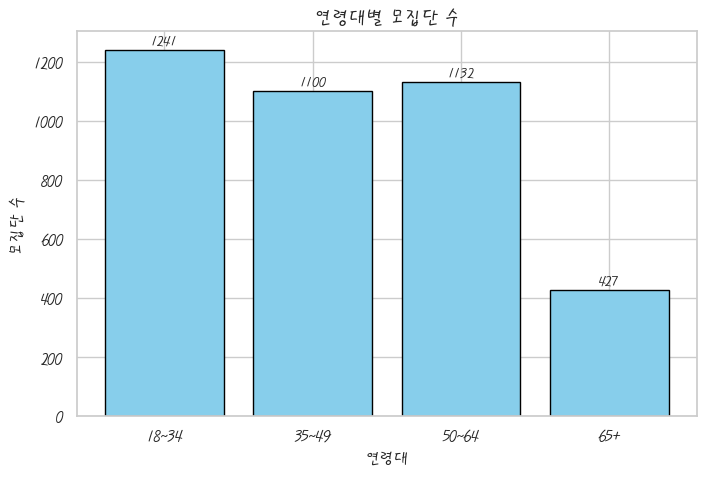

In [ ]:
age_groups = ['18~34', '35~49', '50~64', '65+']
counts = [youth, middle, senior, elderly]

plt.figure(figsize=(8, 5))

plt.bar(age_groups, counts, color='skyblue', edgecolor='black')

plt.title('연령대별 모집단 수', fontsize=14)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('모집단 수', fontsize=12)

# 값 표시
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
# 연령대별 소비 금액의 평균
bins = [18, 35, 50, 65, 120]
labels = ['18~34', '35~49', '50~64', '65+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_avg = df.groupby('Age_Group')['Purchase Amount (USD)'].sum()
print(age_group_avg)

Age_Group
18~34    74658
35~49    65013
50~64    67916
65+      25494
Name: Purchase Amount (USD), dtype: int64


C:\Users\tj\AppData\Local\Temp\ipykernel_17404\961211580.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = df.groupby('Age_Group')['Purchase Amount (USD)'].sum()


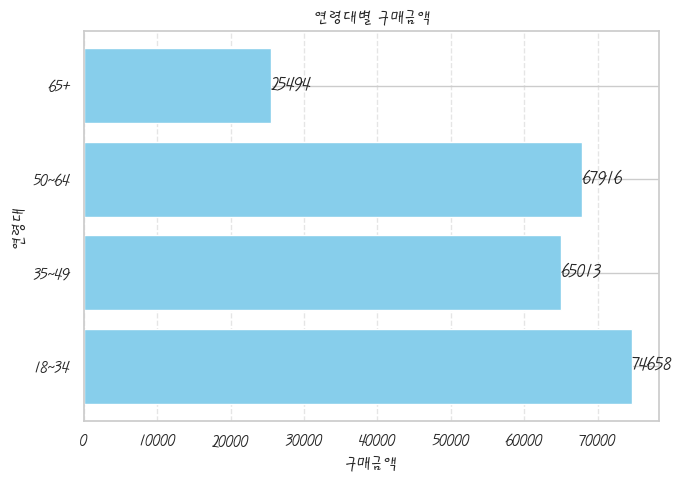

In [ ]:
data = age_group_avg

plt.figure(figsize=(7,5))
plt.barh(data.index, data.values, color='skyblue')

plt.title('연령대별 구매금액')
plt.xlabel('구매금액')
plt.ylabel('연령대')
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i in range(len(data)):
    plt.text(data.values[i], i, round(data.values[i], 1),
            va='center', ha='left')

plt.tight_layout()
plt.show()


In [ ]:
top_items_by_age = (
    df.groupby(['Age_Group', 'Item Purchased'])
    .size()
    .reset_index(name='Count')
)

# 각 연령대별 상위 5개만 추출
top5_by_age = (
    top_items_by_age
    .sort_values(['Age_Group', 'Count'], ascending=[True, False])
    .groupby('Age_Group')
    .head(5)
)

print(top5_by_age.head(10))

   Age_Group Item Purchased  Count
16     18~34          Shirt     64
4      18~34           Coat     59
1      18~34           Belt     56
18     18~34         Shorts     55
19     18~34          Skirt     55
35     35~49         Jacket     58
38     35~49          Pants     57
40     35~49          Scarf     57
26     35~49           Belt     55
39     35~49        Sandals     52


C:\Users\tj\AppData\Local\Temp\ipykernel_17404\4016792562.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group', 'Item Purchased'])
C:\Users\tj\AppData\Local\Temp\ipykernel_17404\4016792562.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age_Group')


C:\Users\tj\AppData\Local\Temp\ipykernel_17404\3122647315.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


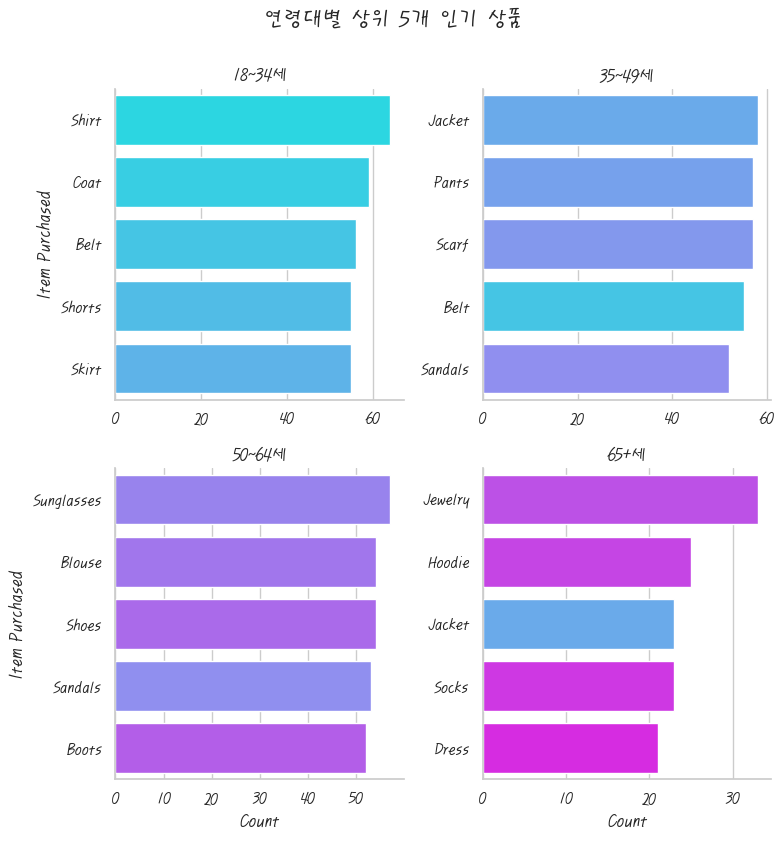

In [ ]:
g = sns.catplot(
    data=top5_by_age,
    x='Count',
    y='Item Purchased',
    col='Age_Group',
    kind='bar',
    col_wrap=2,
    palette='cool',
    sharex=False,
    sharey=False,
    height=4
)

g.set_titles("{col_name}세")
g.fig.suptitle("연령대별 상위 5개 인기 상품", fontsize=16, y=1.05)
plt.show()

In [ ]:
top_items_by_age = (
    df.groupby(['Age_Group', 'Color'])
    .size()
    .reset_index(name='Count')
)

# 각 연령대별 상위 5개만 추출
top5_by_age = (
    top_items_by_age
    .sort_values(['Age_Group', 'Count'], ascending=[True, False])
    .groupby('Age_Group')
    .head(5)
)

print(top5_by_age.head(10))

   Age_Group    Color  Count
8      18~34    Green     63
24     18~34   Yellow     63
11     18~34  Magenta     62
13     18~34    Olive     60
12     18~34   Maroon     56
44     35~49   Silver     58
43     35~49      Red     54
45     35~49     Teal     54
30     35~49     Cyan     52
47     35~49   Violet     49


C:\Users\tj\AppData\Local\Temp\ipykernel_17404\2092709920.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group', 'Color'])
C:\Users\tj\AppData\Local\Temp\ipykernel_17404\2092709920.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age_Group')


C:\Users\tj\AppData\Local\Temp\ipykernel_17404\690199677.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


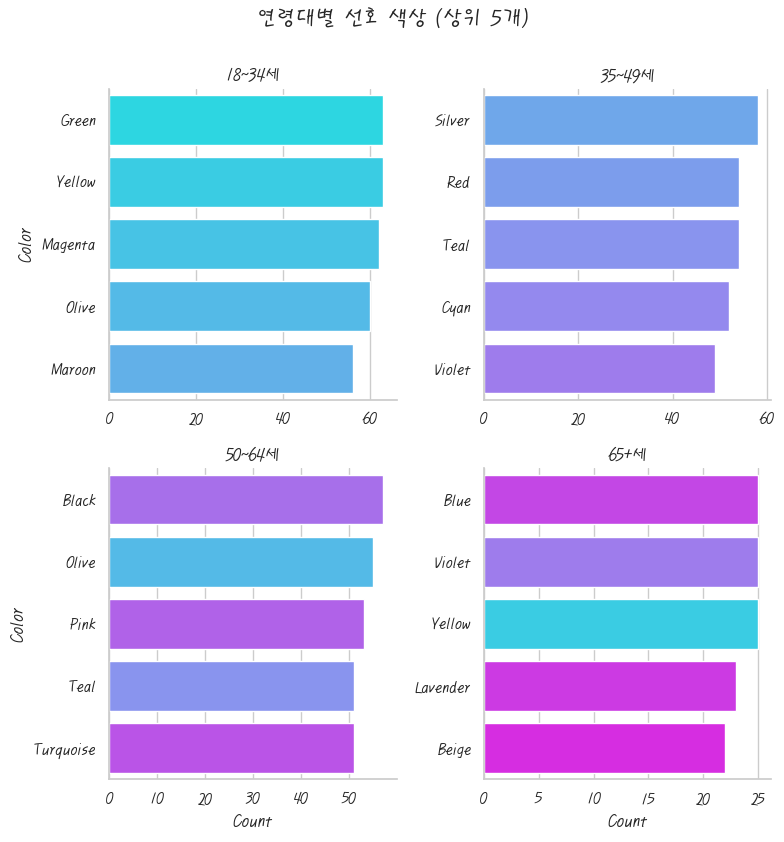

In [ ]:
g = sns.catplot(
    data=top5_by_age,
    x='Count',
    y='Color',
    col='Age_Group',
    kind='bar',
    col_wrap=2,
    palette='cool',
    sharex=False,
    sharey=False,
    height=4
)

g.set_titles("{col_name}세")
g.fig.suptitle("연령대별 선호 색상 (상위 5개)", fontsize=16, y=1.05)
plt.show()

## 구독 여부가 구매 주기에 영향을 미치는가?

In [ ]:
# 구매 주기 종류
df["Frequency of Purchases"].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

   Subscription Status Frequency of Purchases  Count
0                   No               Annually    412
1                   No              Bi-Weekly    407
2                   No         Every 3 Months    430
3                   No            Fortnightly    389
4                   No                Monthly    404
5                   No              Quarterly    423
6                   No                 Weekly    382
7                  Yes               Annually    160
8                  Yes              Bi-Weekly    140
9                  Yes         Every 3 Months    154
10                 Yes            Fortnightly    153
11                 Yes                Monthly    149
12                 Yes              Quarterly    140
13                 Yes                 Weekly    157


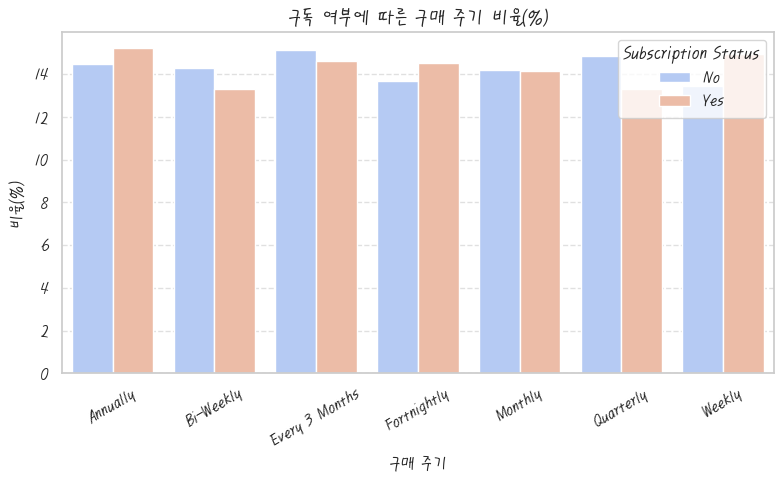

In [ ]:
freq_sub = (
    df.groupby(['Subscription Status', 'Frequency of Purchases'])
    .size()
    .reset_index(name='Count')
)

print(freq_sub)

freq_sub['Percent'] = (
    freq_sub.groupby('Subscription Status')['Count']
    .transform(lambda x: (x / x.sum()) * 100)
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=freq_sub,
    x='Frequency of Purchases',
    y='Percent',
    hue='Subscription Status',
    palette='coolwarm'
)

plt.title('구독 여부에 따른 구매 주기 비율(%)', fontsize=14)
plt.xlabel('구매 주기', fontsize=12)
plt.ylabel('비율(%)', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()


## 배송 방법이 평점에 영향을 미치는가?

In [ ]:
# 배송방법 종류
df["Shipping Type"].unique()

# '익스프레스', '무료 배송', ' 익일 항공', '표준', '2일 배송', '매장 픽업'

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

C:\Users\tj\AppData\Local\Temp\ipykernel_17404\2615029908.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['RatingGroup', 'Shipping Type'])


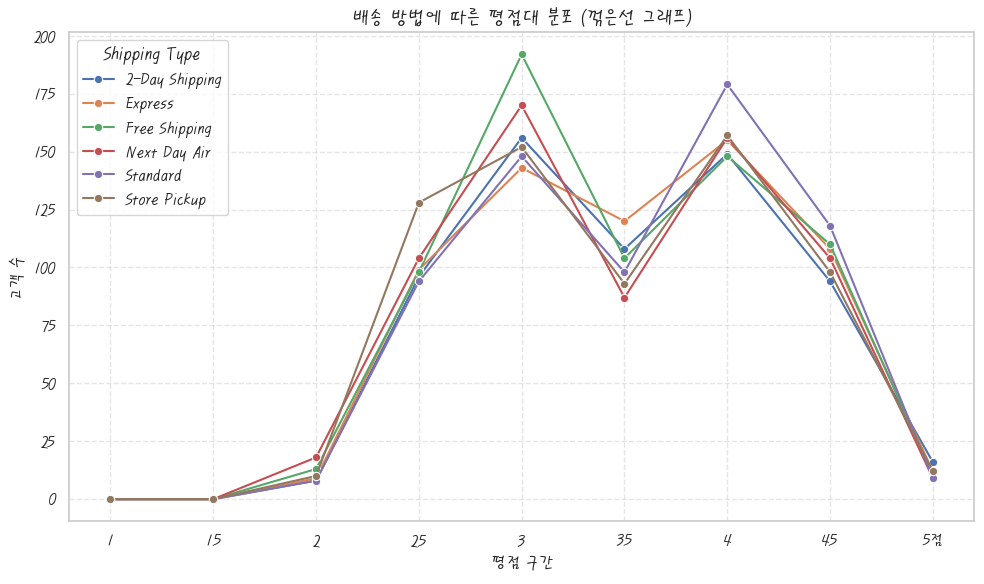

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 평점 구간화
bins = [0.9, 1.5, 1.9, 2.5, 2.9, 3.5, 3.9, 4.5, 4.9, 5.1]
labels = ['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5점']
df['RatingGroup'] = pd.cut(df['Review Rating'], bins=bins, labels=labels, right=True)

# 2. 할인 여부별 평점대 개수 집계
rating_counts = (
    df.groupby(['RatingGroup', 'Shipping Type'])
    .size()
    .reset_index(name='Count')
)

# 3. 시각화 (꺾은선그래프)
plt.figure(figsize=(10,6))
sns.lineplot(
    data=rating_counts,
    x='RatingGroup',
    y='Count',
    hue='Shipping Type',
    marker='o'
)

plt.title('배송 방법에 따른 평점대 분포 (꺾은선 그래프)', fontsize=14)
plt.xlabel('평점 구간', fontsize=12)
plt.ylabel('고객 수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 평점과 배송방법별로 몇 명씩 있는지 집계
rating_counts_exact = (
    df.groupby(['Review Rating', 'Shipping Type'])
    .size()
    .reset_index(name='Count')
    .sort_values('Review Rating')
)

In [ ]:
# 구독률 계산
total_customers = len(df)
subscribed_customers = len(df[df['Subscription Status'] == 'Yes'])

subscription_rate = (subscribed_customers / total_customers) * 100
print(f"전체 구독률: {subscription_rate:.2f}%")

전체 구독률: 27.00%


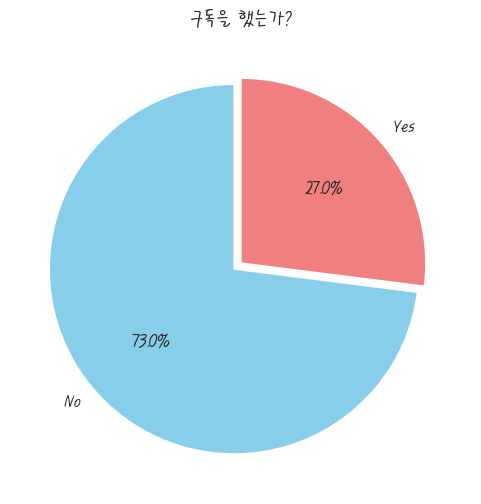

In [ ]:
sub_counts = df['Subscription Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sub_counts,
    labels=sub_counts.index,
    autopct='%.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    explode=[0.05, 0]  # Yes 쪽 살짝 강조
)
plt.title('구독을 했는가?', fontsize=14)
plt.show()


In [ ]:
def location_separate(location):
    
    EAST_STATES = ('Alabama', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Mississippi', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virginia', 'West Virginia')
    CENTRAL_STATES = ('Arkansas', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'Oklahoma', 'South Dakota', 'Texas', 'Wisconsin')
        
    if location in EAST_STATES :
        return '동부'
    elif location in CENTRAL_STATES :
        return '중부'
    else:
        return '서부'    

    # 동부 (East)   Alabama, Connecticut, Delaware, Florida, Georgia, Kentucky, Maine, Maryland, Massachusetts, Mississippi, New Hampshire, New Jersey, New York, North Carolina, Pennsylvania, Rhode Island, South Carolina, Tennessee, Vermont, Virginia, West Virginia
    # 중부 (Central)   Arkansas, Illinois, Indiana, Iowa, Kansas, Louisiana, Michigan, Minnesota, Missouri, Nebraska, North Dakota, Ohio, Oklahoma, South Dakota, Texas, Wisconsin
    # 서부 (West)   Alaska, Arizona, California, Colorado, Hawaii, Idaho, Montana, Nevada, New Mexico, Oregon, Utah, Washington, Wyoming

location_category = df['Location'].apply(location_separate)
df['Region'] = location_category           

df['Region'].value_counts()

Region
동부    1630
중부    1252
서부    1018
Name: count, dtype: int64

In [ ]:
# 모집단 명수를 맞춰준다
# 그리고 지역별로 매출 추이를 구한다
# 그리고 어떤 품목이 제일 잘나가는지 구한다
# 품목별로 잘팔리는 색상을 구한다



In [ ]:
# 지역별로 1000명씩
balanced_df = (
    df.groupby('Region', group_keys=False)
    .apply(lambda x: x.sample(n=1000, random_state=42))
)

print(balanced_df['Region'].value_counts())

Region
동부    1000
서부    1000
중부    1000
Name: count, dtype: int64


C:\Users\tj\AppData\Local\Temp\ipykernel_17404\3584068266.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=1000, random_state=42))


In [ ]:
region_sales = df.groupby('Region')['Purchase Amount (USD)'].sum().reset_index()
region_sales.rename(columns={'Purchase Amount (USD)': '총매출(USD)'}, inplace=True)

print(region_sales)

  Region  총매출(USD)
0     동부     96444
1     서부     62289
2     중부     74348


In [ ]:
top_items_count = (
    df.groupby(['Region', 'Item Purchased'])
    .size()
    .reset_index(name='Count')
)

# 각 지역별 가장 잘 나간 상품
top_items_count = top_items_count.sort_values(['Region', 'Count'], ascending=[True, False]).groupby('Region').head(1)
print(top_items_count)

   Region Item Purchased  Count
2      동부         Blouse     77
25     서부       Backpack     51
60     중부         Jacket     63


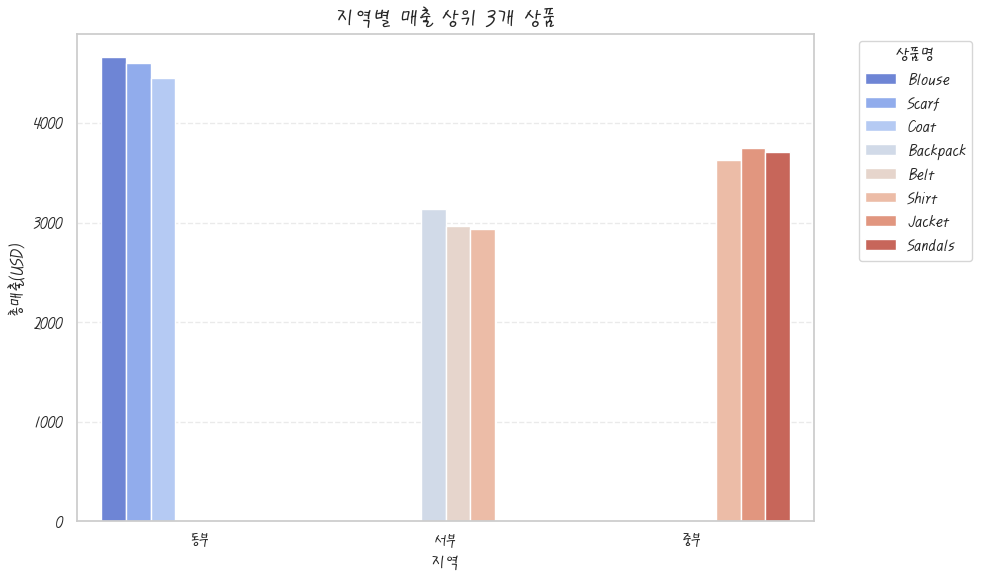

In [ ]:
top_items_sales = (
    df.groupby(['Region', 'Item Purchased'])['Purchase Amount (USD)']
    .sum()
    .reset_index(name='Total Sales')
)

top_items_sales = (
    top_items_sales
    .sort_values(['Region', 'Total Sales'], ascending=[True, False])
    .groupby('Region')
    .head(3)
)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_items_sales,
    x='Region',
    y='Total Sales',
    hue='Item Purchased',
    palette='coolwarm'
)

plt.title('지역별 매출 상위 3개 상품', fontsize=15)
plt.xlabel('지역', fontsize=12)
plt.ylabel('총매출(USD)', fontsize=12)
plt.legend(title='상품명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

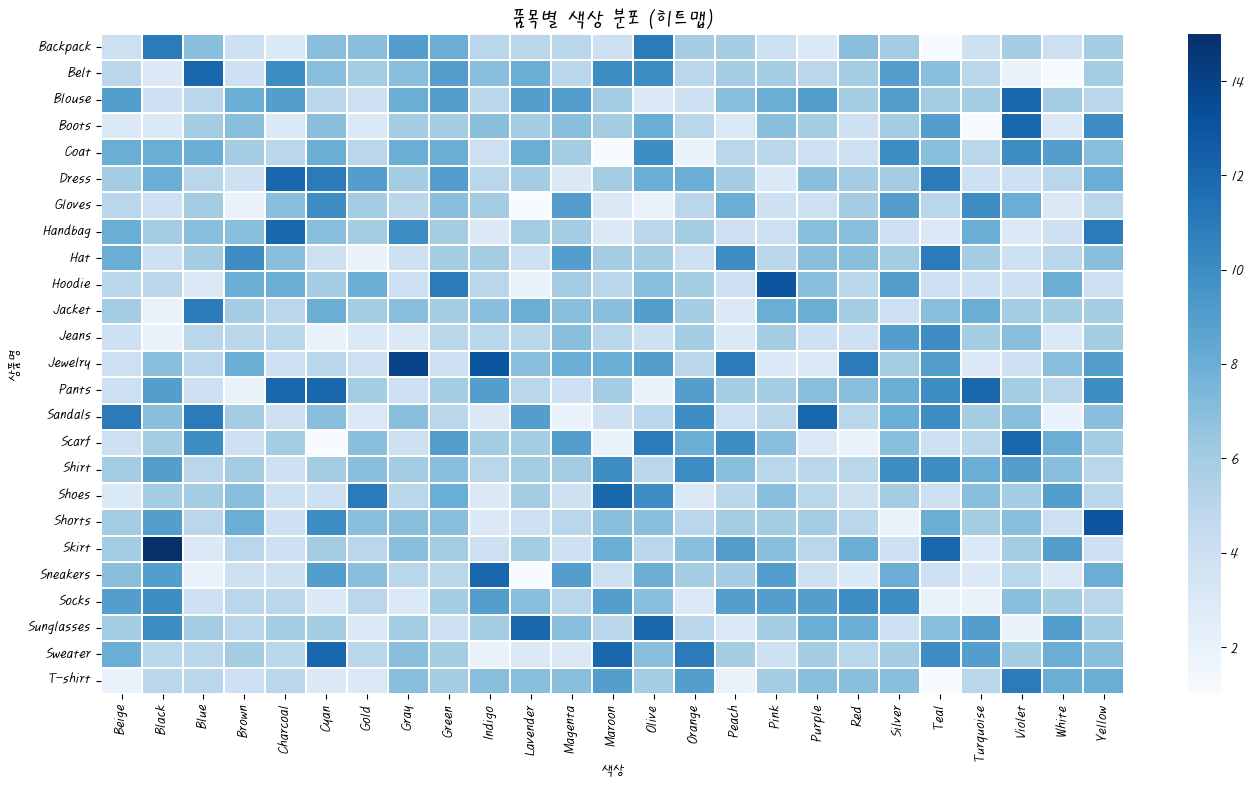

In [ ]:
item_color_counts = (
    df.groupby(['Item Purchased', 'Color'])
    .size()
    .unstack(fill_value=0)
)
 
plt.figure(figsize=(14,8))
sns.heatmap(item_color_counts, cmap='Blues', linewidths=0.3)
plt.title('품목별 색상 분포 (히트맵)', fontsize=15)
plt.xlabel('색상')
plt.ylabel('상품명')
plt.tight_layout()
plt.show()

In [ ]:
def classify_item(item):
    if item in ['Shirt', 'T-shirt', 'Sweater', 'Blouse', 'Hoodie', 'Jacket', 'Coat']:
        return '상의'
    elif item in ['Jeans', 'Pants', 'Shorts', 'Skirt']:
        return '하의'
    elif item in ['Dress']:
        return '원피스'
    elif item in ['Shoes', 'Sneakers', 'Boots', 'Sandals']:
        return '신발'
    elif item in ['Handbag', 'Backpack']:
        return '가방'
    elif item in ['Scarf', 'Hat', 'Gloves', 'Belt', 'Jewelry', 'Sunglasses']:
        return '액세서리'
    else:
        return '기타'

df['Item Category (Refined)'] = df['Item Purchased'].apply(classify_item)

print(df['Item Category (Refined)'].value_counts())


Item Category (Refined)
상의      1126
액세서리     944
하의       610
신발       599
가방       296
원피스      166
기타       159
Name: count, dtype: int64


C:\Users\tj\AppData\Local\Temp\ipykernel_2212\1814834324.py:15: UserWarning: The palette list has more values (21) than needed (13), which may not be intended.
  sns.barplot(


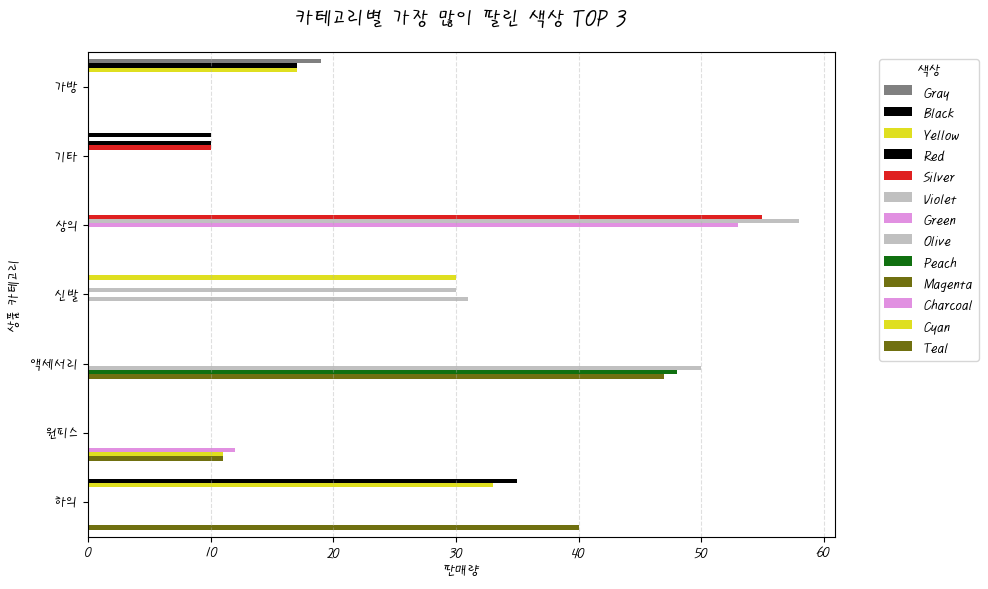

In [ ]:
color_rank = (
    df.groupby(['Item Category (Refined)', 'Color'])
    .size()
    .reset_index(name='Count')
)

top3_colors = (
    color_rank
    .sort_values(['Item Category (Refined)', 'Count'], ascending=[True, False])
    .groupby('Item Category (Refined)')
    .head(3)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top3_colors,
    x='Count',
    y='Item Category (Refined)',
    hue='Color',
    palette=top3_colors['Color'].tolist()
)

plt.title('카테고리별 가장 많이 팔린 색상 TOP 3', fontsize=15, pad=12)
plt.xlabel('판매량')
plt.ylabel('상품 카테고리')
plt.legend(title='색상', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [19]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

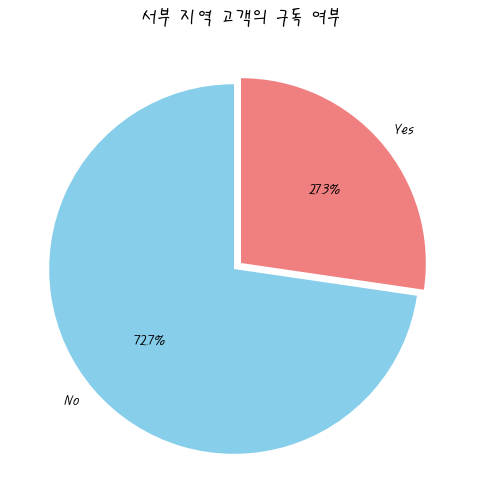

In [42]:

east_df = df[df['Region'] == '서부']

sub_counts_east = east_df['Subscription Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sub_counts_east,
    labels=sub_counts_east.index,
    autopct='%.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    explode=[0.05, 0]  # Yes 쪽 살짝 강조
)

plt.title('서부 지역 고객의 구독 여부', fontsize=14)
plt.show()


서부 지역 전체 인원수: 1,018명
\서부 지역 내 주별 인원수:
Location
Montana       96
California    95
Idaho         93
Nevada        87
New Mexico    81
Colorado      75
Oregon        74
Washington    73
Alaska        72
Utah          71
Wyoming       71
Hawaii        65
Arizona       65
Name: count, dtype: int64


C:\Users\tj\AppData\Local\Temp\ipykernel_15024\3426562273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


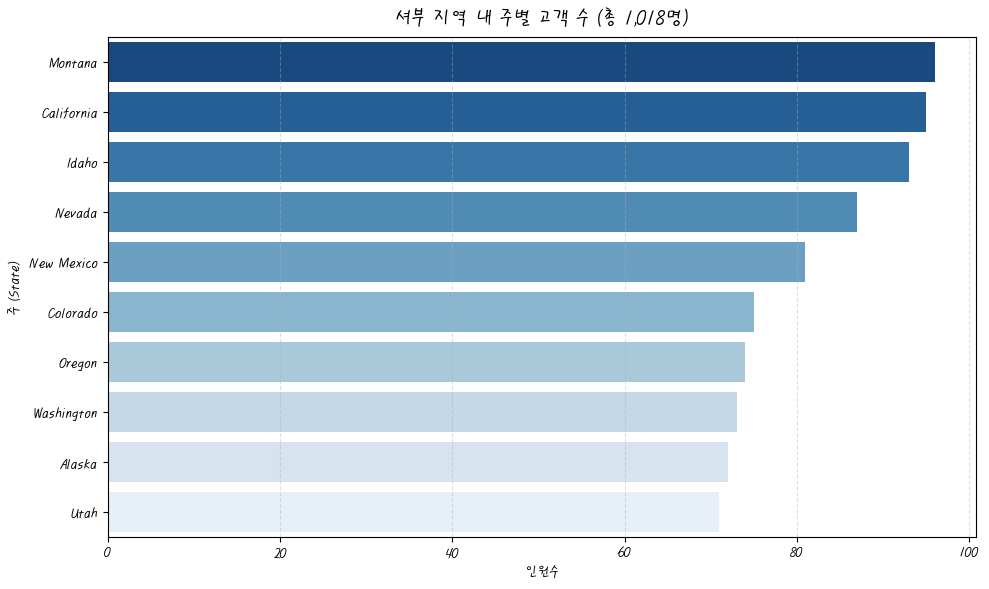

In [ ]:
east_df = df[df['Region'] == '서부']

total_east_count = len(east_df)
print(f"서부 지역 전체 인원수: {total_east_count:,}명")

east_location_counts = east_df['Location'].value_counts().sort_values(ascending=False)
print("\서부 지역 내 주별 인원수:")
print(east_location_counts)

plt.figure(figsize=(10,6))
sns.barplot(
    x=east_location_counts.head(10).values,
    y=east_location_counts.head(10).index,
    palette='Blues_r'
)

plt.title(f'셔부 지역 내 주별 고객 수 (총 {total_east_count:,}명)', fontsize=14, pad=10)
plt.xlabel('인원수')
plt.ylabel('주 (State)')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

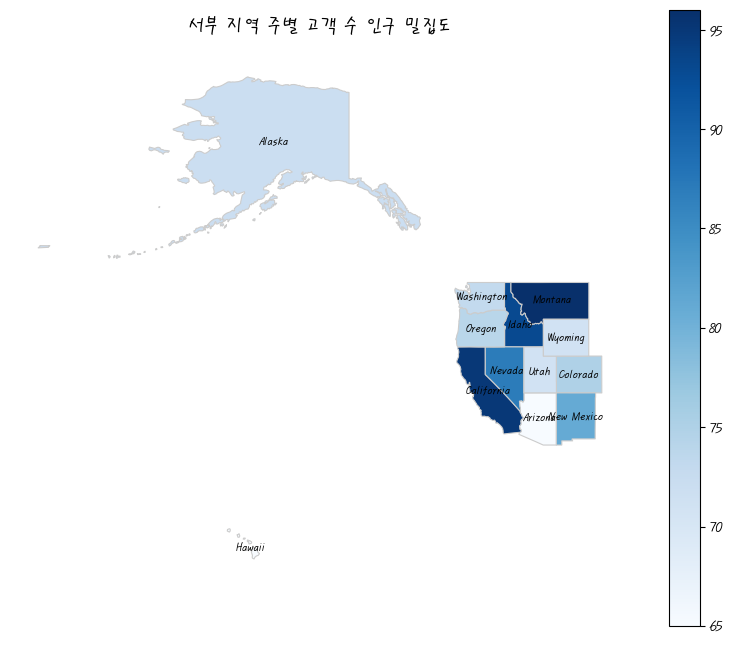

In [44]:
import geopandas as gpd

east_df = df[df['Region']=='서부']
east_location_counts = east_df['Location'].value_counts().reset_index()
east_location_counts.columns = ['state','count']


url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
states_gdf = gpd.read_file(url)


merged = states_gdf.merge(east_location_counts, left_on='name', right_on='state', how='left')
merged['count'] = merged['count'].fillna(0)


east_states = east_location_counts['state'].tolist()
merged_east = merged[merged['name'].isin(east_states)]


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_east.plot(
    column='count',
    cmap='Blues',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)


for idx, row in merged_east.iterrows():
    plt.text(
        row['geometry'].centroid.x,   
        row['geometry'].centroid.y,   
        row['name'],         
        fontsize=8,
        ha='center',
        va='center',
        color='black'
    )

ax.set_title('서부 지역 주별 고객 수 인구 밀집도', fontsize=14, pad=15)
ax.set_axis_off()
plt.show()


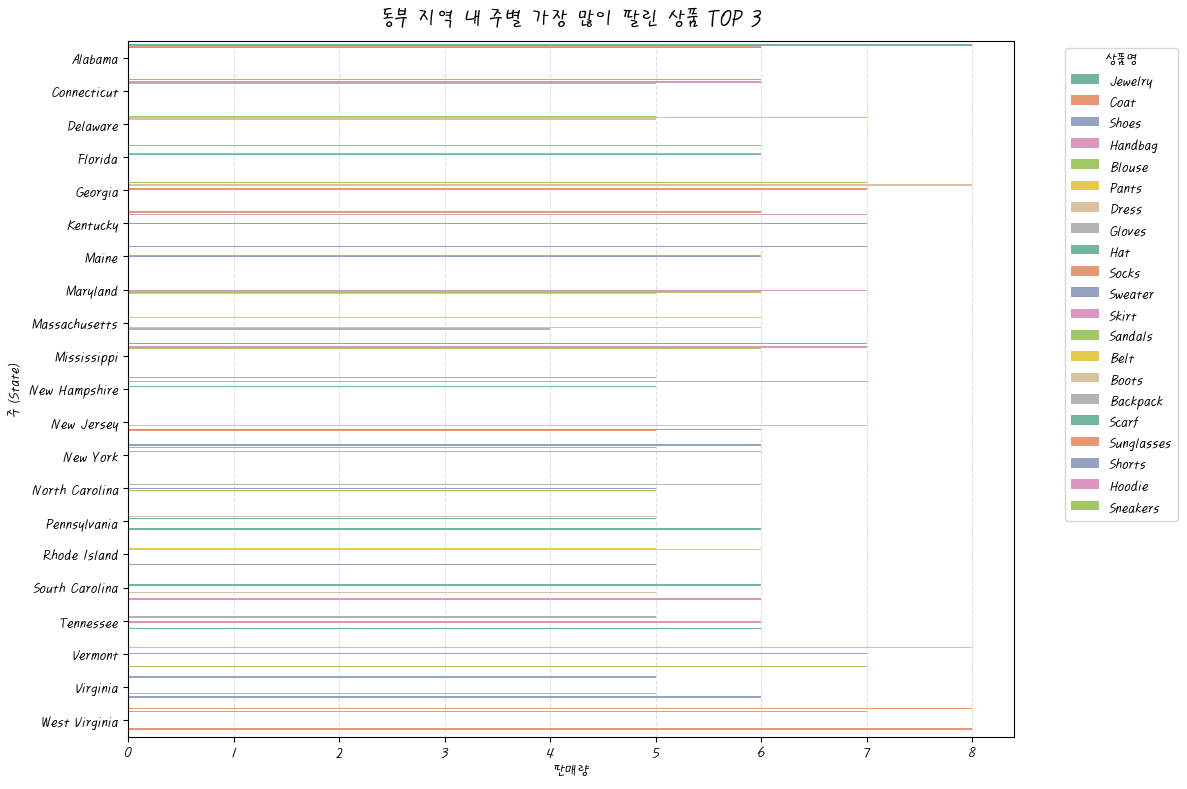

In [ ]:

east_df = df[df['Region'] == '동부']


location_item_rank = (
    east_df.groupby(['Location', 'Item Purchased'])
    .size()
    .reset_index(name='Count')
)


top3_items_by_location = (
    location_item_rank
    .sort_values(['Location', 'Count'], ascending=[True, False])
    .groupby('Location')
    .head(3)
)


plt.figure(figsize=(12, 8))
sns.barplot(
    data=top3_items_by_location,
    x='Count',
    y='Location',
    hue='Item Purchased',
    palette='Set2'   # 부드럽고 시각적으로 구분 잘 되는 팔레트
)

plt.title('동부 지역 내 주별 가장 많이 팔린 상품 TOP 3', fontsize=15, pad=12)
plt.xlabel('판매량')
plt.ylabel('주 (State)')
plt.legend(title='상품명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
